In [1]:
import numpy as np; np.random.seed(42)
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from  matplotlib.colors import LinearSegmentedColormap

c = ['darkblue', 'blue', 'lightblue', 'white', 'lightcoral', 'red', 'darkred']
v = [0,.15,.4,.5,0.6,.9,1.]
l = list(zip(v,c))
cmap=LinearSegmentedColormap.from_list('rg',l, N=256)

In [2]:
df5 = pd.read_csv('log_6.csv', names=['percentage_lazy','chance_of_selfishness','num_agents','avg_health' ])
df6 = pd.read_csv('logtay.csv', names=['percentage_lazy','chance_of_selfishness','num_agents','avg_health' ])
df7 = pd.read_csv('log_lazy.csv', names=['percentage_lazy','chance_of_selfishness','num_agents','avg_health' ])

frames = [df5, df6, df7]

df8 = pd.concat(frames)

df8['chance_of_selfishness'] = df8['chance_of_selfishness']

df8['percentage_wandering'] = 1-df8['percentage_lazy']

df8['adjusted_chance_of_selfishness'] = df8['chance_of_selfishness'] * df8['percentage_wandering']
df8['adjusted_chance_of_sharing'] = (1-df8['chance_of_selfishness']) * df8['percentage_wandering']
df8['adjusted_fitness'] = (df8['num_agents'] * df8['avg_health']) / 50
percentage_lazy = df8['percentage_lazy']
coself = df8['adjusted_chance_of_selfishness']
cosharing = df8['adjusted_chance_of_sharing']
num_agents = df8['num_agents']
avg_health = df8['avg_health']
fitness = df8['adjusted_fitness']

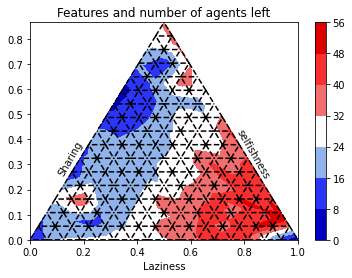

In [3]:

percentage_lazy = df8['percentage_lazy']
coself = df8['adjusted_chance_of_selfishness']
cosharing = df8['adjusted_chance_of_sharing']
num_agents = df8['num_agents']
avg_health = df8['avg_health']
fitness = df8['adjusted_fitness']
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = num_agents

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and number of agents left')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

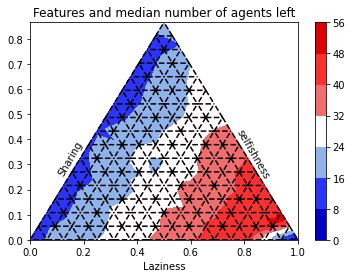

In [4]:
grouped_multiple = df8.groupby(['percentage_lazy', 'adjusted_chance_of_sharing', 'adjusted_chance_of_selfishness']).agg({'num_agents': ['median']})
grouped_multiple.columns = ['num_agents']
grouped_multiple = grouped_multiple.reset_index()
# grouped_multiple


percentage_lazy = grouped_multiple['percentage_lazy']
coself = grouped_multiple['adjusted_chance_of_selfishness']
cosharing = grouped_multiple['adjusted_chance_of_sharing']
num_agents = grouped_multiple['num_agents']

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = num_agents

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and median number of agents left')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

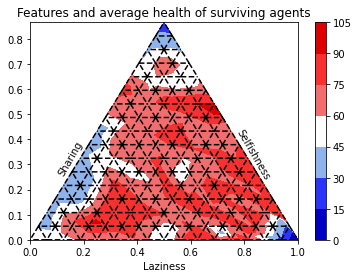

In [5]:
percentage_lazy = df8['percentage_lazy']
coself = df8['adjusted_chance_of_selfishness']
cosharing = df8['adjusted_chance_of_sharing']
num_agents = df8['num_agents']
avg_health = df8['avg_health']
fitness = df8['adjusted_fitness']
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = avg_health

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and average health of surviving agents')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'Selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

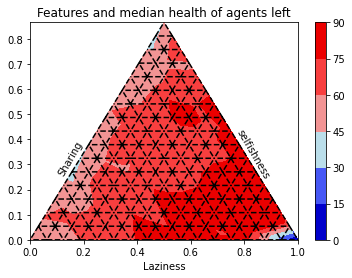

In [6]:
grouped_multiple = df8.groupby(['percentage_lazy', 'adjusted_chance_of_sharing', 'adjusted_chance_of_selfishness']).agg({'avg_health': ['median']})
grouped_multiple.columns = ['avg_health']
grouped_multiple = grouped_multiple.reset_index()
# grouped_multiple


percentage_lazy = grouped_multiple['percentage_lazy']
coself = grouped_multiple['adjusted_chance_of_selfishness']
cosharing = grouped_multiple['adjusted_chance_of_sharing']
avg_health = grouped_multiple['avg_health']

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = avg_health

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and median health of agents left')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

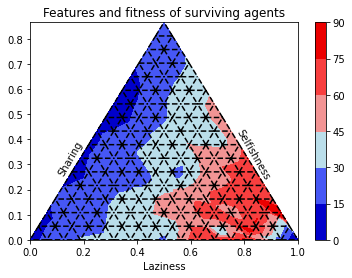

In [7]:
percentage_lazy = df8['percentage_lazy']
coself = df8['adjusted_chance_of_selfishness']
cosharing = df8['adjusted_chance_of_sharing']
num_agents = df8['num_agents']
avg_health = df8['avg_health']
fitness = df8['adjusted_fitness']
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = fitness

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and fitness of surviving agents')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'Selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

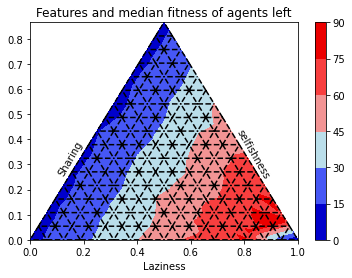

In [8]:
grouped_multiple = df8.groupby(['percentage_lazy', 'adjusted_chance_of_sharing', 'adjusted_chance_of_selfishness']).agg({'adjusted_fitness': ['median']})
grouped_multiple.columns = ['adjusted_fitness']
grouped_multiple = grouped_multiple.reset_index()
# grouped_multiple


percentage_lazy = grouped_multiple['percentage_lazy']
coself = grouped_multiple['adjusted_chance_of_selfishness']
cosharing = grouped_multiple['adjusted_chance_of_sharing']
fitness = grouped_multiple['adjusted_fitness']

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = fitness

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and median fitness of agents left')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

In [9]:
grouped_multiple = df8.groupby(['percentage_lazy', 'adjusted_chance_of_sharing', 'adjusted_chance_of_selfishness']).agg({'num_agents': ['median']})
grouped_multiple.columns = ['num_agents']
grouped_multiple = grouped_multiple.reset_index()
# grouped_multiple


In [10]:
percentage_lazy = grouped_multiple['percentage_lazy']
coself = grouped_multiple['adjusted_chance_of_selfishness']
cosharing = grouped_multiple['adjusted_chance_of_sharing']
num_agents = grouped_multiple['num_agents']
# avg_health = df4['avg_health']

In [11]:
from  matplotlib.colors import LinearSegmentedColormap

c = ['darkblue', 'blue', 'lightblue', 'lightcoral', 'red', 'darkred']
v = [0,.12,.4,.5,.9,1.]
l = list(zip(v,c))
cmap=LinearSegmentedColormap.from_list('rg',l, N=256)

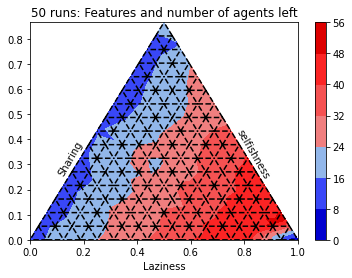

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = num_agents

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('50 runs: Features and number of agents left')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

In [13]:
df = df8

In [19]:
pd.set_option('display.max_rows', 150)
g = df.groupby(['percentage_lazy', 'chance_of_selfishness'])['num_agents'].median()
f = df.groupby(['percentage_lazy', 'chance_of_selfishness'])['adjusted_fitness'].median()

In [20]:
g

percentage_lazy  chance_of_selfishness
0.0              0.0                      19.5
                 0.1                      12.5
                 0.2                      11.5
                 0.3                      12.5
                 0.4                       9.0
                 0.5                      15.5
                 0.6                      15.0
                 0.7                      12.5
                 0.8                      10.0
                 0.9                      11.5
                 1.0                       9.5
0.1              0.0                      15.5
                 0.1                      18.0
                 0.2                      17.0
                 0.3                      16.0
                 0.4                      17.5
                 0.5                      16.0
                 0.6                      19.0
                 0.7                      16.0
                 0.8                      17.5
                 0.9 

In [21]:
f

percentage_lazy  chance_of_selfishness
0.0              0.0                      11.690139
                 0.1                      11.293000
                 0.2                      11.416250
                 0.3                      11.974917
                 0.4                       9.402583
                 0.5                      14.030278
                 0.6                      11.897556
                 0.7                      12.264722
                 0.8                      11.698333
                 0.9                      10.120250
                 1.0                       9.191889
0.1              0.0                      20.051278
                 0.1                      20.720750
                 0.2                      22.321250
                 0.3                      19.937806
                 0.4                      20.208944
                 0.5                      21.298425
                 0.6                      20.577563
                 0.7     

In [38]:
grouped_multiple = df8.groupby(['percentage_lazy', 'adjusted_chance_of_sharing', 'adjusted_chance_of_selfishness', 'chance_of_selfishness']).agg({'num_agents': ['median']})
grouped_multiple.columns = ['num_agents']
grouped_multiple = grouped_multiple.reset_index()

c = grouped_multiple.loc[(grouped_multiple['chance_of_selfishness']==1) | (grouped_multiple['chance_of_selfishness']==0)]

grouped_multiple = df8.groupby(['percentage_lazy', 'adjusted_chance_of_sharing', 'adjusted_chance_of_selfishness', 'chance_of_selfishness']).agg({'adjusted_fitness': ['median']})
grouped_multiple.columns = ['adjusted_fitness']
grouped_multiple = grouped_multiple.reset_index()

b = grouped_multiple.loc[(grouped_multiple['chance_of_selfishness']==1) | (grouped_multiple['chance_of_selfishness']==0)]

b = b[['percentage_lazy', 'chance_of_selfishness', 'adjusted_fitness']]
new_df = pd.merge(b, c,  how='inner', on = ['percentage_lazy','chance_of_selfishness'])


new_df[['percentage_lazy', 'chance_of_selfishness', 'num_agents', 'adjusted_fitness']]
# new_df.set_index('percentage_lazy', inplace=True)
# new_df

,percentage_lazy,chance_of_selfishness,num_agents,adjusted_fitness
0,0.0,1.0,9.5,9.191889
1,0.0,0.0,19.5,11.690139
2,0.1,1.0,21.0,21.485389
3,0.1,0.0,15.5,20.051278
4,0.2,1.0,21.0,28.001907
5,0.2,0.0,24.0,29.536545
6,0.3,1.0,26.5,34.216183
7,0.3,0.0,27.5,36.829520
8,0.4,1.0,29.5,44.301317
9,0.4,0.0,28.0,47.948275


In [39]:
df['group'] = np.where(
    ((df.percentage_lazy > 0)&(df.percentage_lazy <= 0.3)) & (df.chance_of_selfishness <= 0.4), 
    'low-low',
    np.where((df.percentage_lazy > 0)& ((df.percentage_lazy <= 0.3)) & ((df.chance_of_selfishness > 0.4) & (df.chance_of_selfishness <= 0.6)), 
             'low-medium',
    np.where((df.percentage_lazy > 0)& ((df.percentage_lazy <= 0.3)) & ((df.chance_of_selfishness > 0.6) & (df.chance_of_selfishness <= 0.9)),
             'low-high',
    np.where((df.percentage_lazy > 0.3)& ((df.percentage_lazy <= 0.6)) & (df.chance_of_selfishness <= 0.4), 
             'medium-low',
    np.where((df.percentage_lazy > 0.3)& ((df.percentage_lazy <= 0.6)) & ((df.chance_of_selfishness > 0.4) & (df.chance_of_selfishness <= 0.6)), 
             'medium-medium',
    np.where((df.percentage_lazy > 0.3)& ((df.percentage_lazy <= 0.6)) & ((df.chance_of_selfishness > 0.6) & (df.chance_of_selfishness <= 0.9)),
             'medium-high',
    np.where((df.percentage_lazy > 0.6)& ((df.percentage_lazy <= 0.9)) & (df.chance_of_selfishness <= 0.4), 
             'high-low',
    np.where((df.percentage_lazy > 0.6)& ((df.percentage_lazy <= 0.9)) & ((df.chance_of_selfishness > 0.4) & (df.chance_of_selfishness <= 0.6)), 
             'high-medium',
    np.where((df.percentage_lazy > 0.6)& ((df.percentage_lazy <= 0.9)) & ((df.chance_of_selfishness > 0.6) & (df.chance_of_selfishness <= 0.9)),
             'high-high',
             'extremes')))))))))


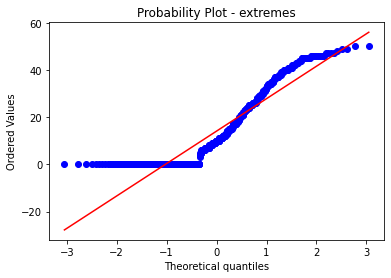

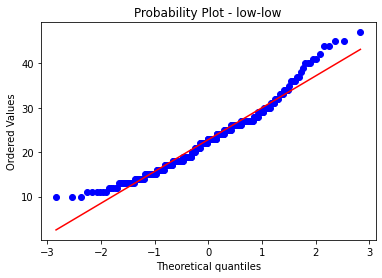

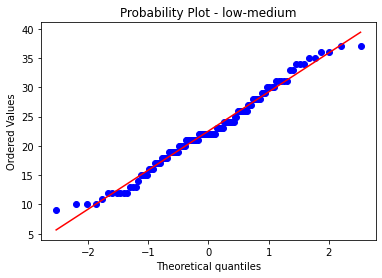

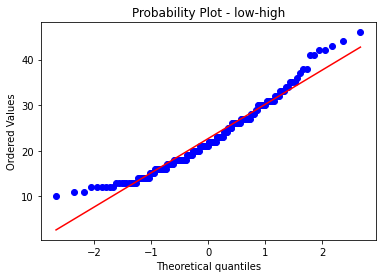

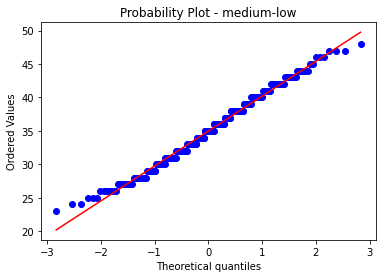

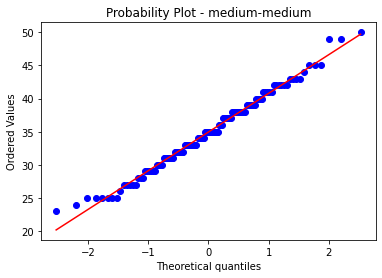

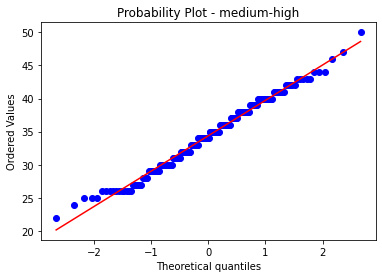

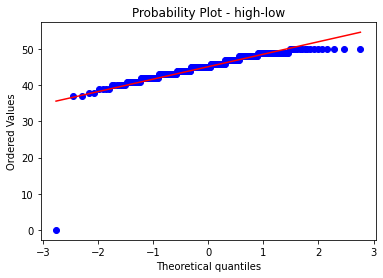

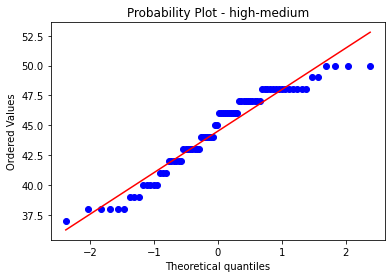

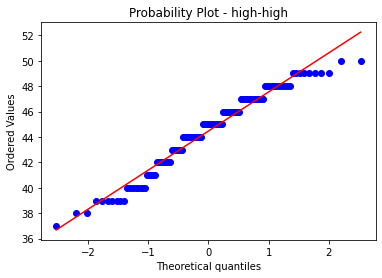

In [40]:
selfishness = df

import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt

unique_selfishness = selfishness['group'].unique()
for major in unique_selfishness:
    stats.probplot(selfishness[selfishness['group'] == major]['num_agents'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  str(major))
    plt.show()

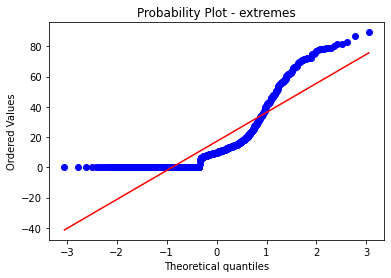

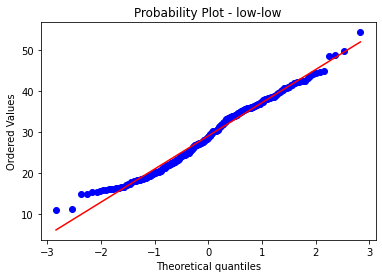

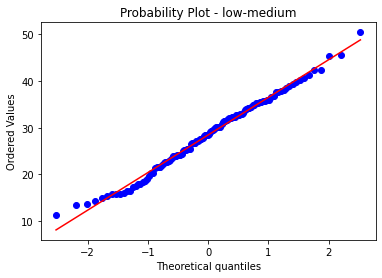

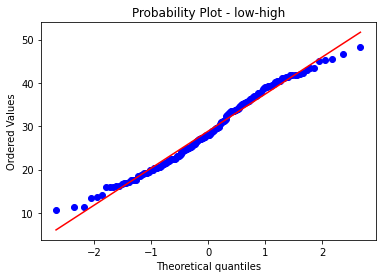

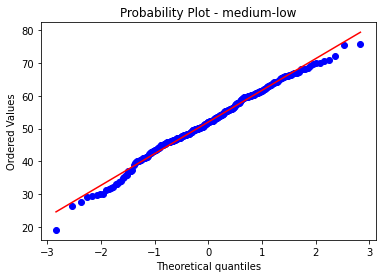

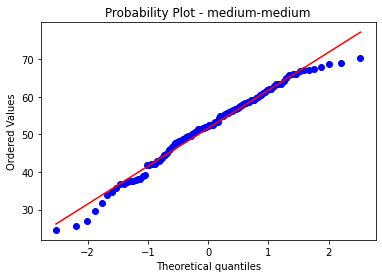

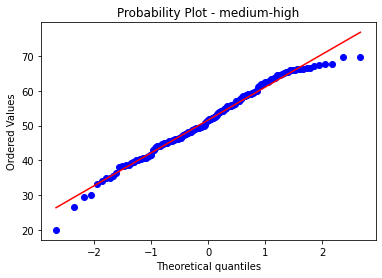

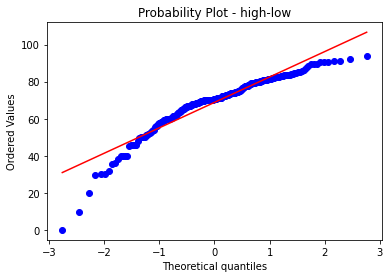

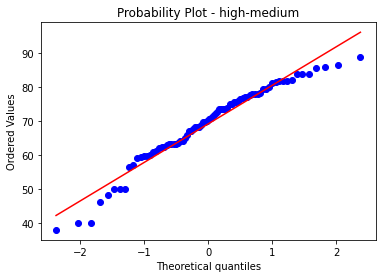

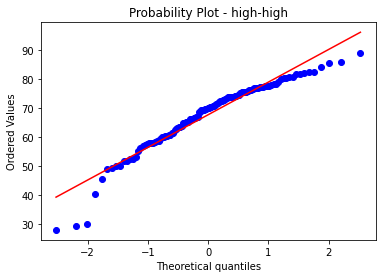

In [41]:
selfishness = df

import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt

unique_selfishness = selfishness['group'].unique()
for major in unique_selfishness:
    stats.probplot(selfishness[selfishness['group'] == major]['adjusted_fitness'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  str(major))
    plt.show()

# Poisson

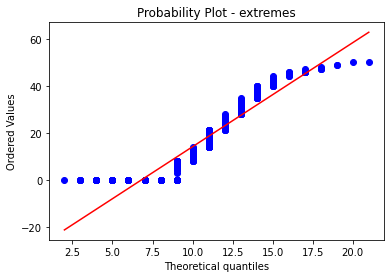

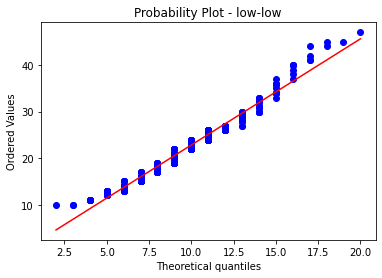

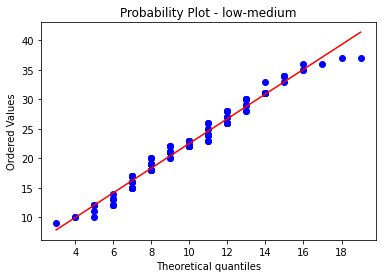

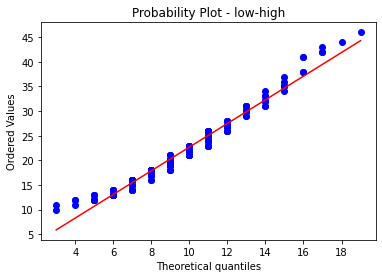

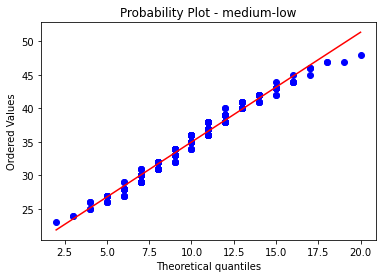

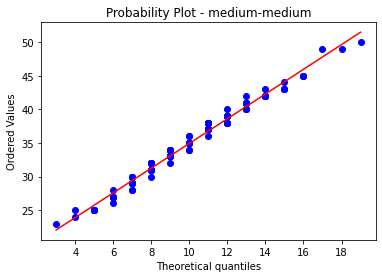

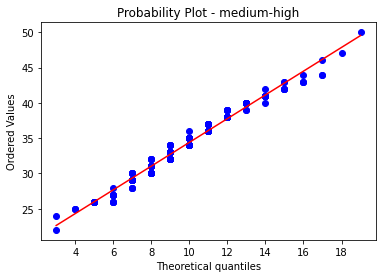

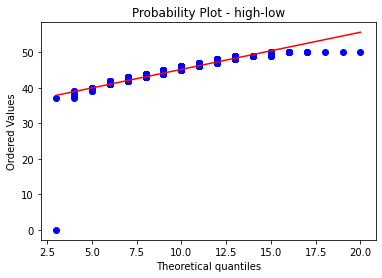

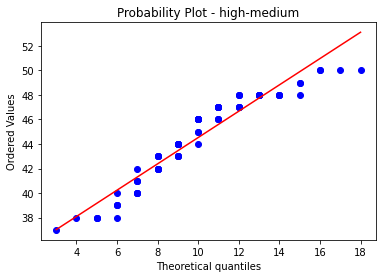

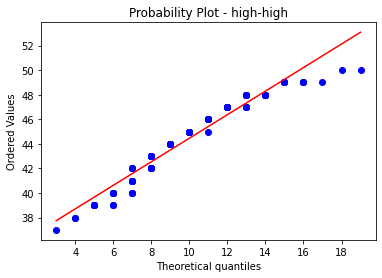

In [42]:
unique_selfishness = selfishness['group'].unique()
for major in unique_selfishness:
    stats.probplot(selfishness[selfishness['group'] == major]['num_agents'], dist=stats.poisson(mu=10), plot=plt)
    plt.title("Probability Plot - " +  str(major))
    plt.show()

In [43]:
from scipy import stats

df2 = df[['group', 'num_agents']]

x = df2.loc[df['group'] == 'low-low']['num_agents'].tolist()
xx = df2.loc[df['group'] == 'low-medium']['num_agents'].tolist()
xxx = df2.loc[df['group'] == 'low-high']['num_agents'].tolist()
y = df2.loc[df['group'] == 'medium-low']['num_agents'].tolist()
yy = df2.loc[df['group'] == 'medium-medium']['num_agents'].tolist()
yyy = df2.loc[df['group'] == 'medium-high']['num_agents'].tolist()
z = df2.loc[df['group'] == 'high-low']['num_agents'].tolist()
zz = df2.loc[df['group'] == 'high-medium']['num_agents'].tolist()
zzz = df2.loc[df['group'] == 'high-high']['num_agents'].tolist()

stats.kruskal(x,xx, xxx, y, yy, yyy, z,zz, zz)

KruskalResult(statistic=1141.0553664483461, pvalue=5.199241128422715e-241)

In [44]:
data = [x, xx, xxx, y, yy, yyy, z, zz, zzz]

import scikit_posthocs as sp
sp.posthoc_dunn(data, p_adjust = 'bonferroni')

,1,2,3,4,5,6,7,8,9
1,1.000000e+00,1.000000e+00,1.000000e+00,1.565875e-38,5.311354e-22,8.734823e-26,1.928676e-138,4.860576e-61,1.984965e-82
2,1.000000e+00,1.000000e+00,1.000000e+00,2.937805e-23,3.042715e-16,1.820271e-17,1.960165e-85,9.906833e-48,2.182113e-59
3,1.000000e+00,1.000000e+00,1.000000e+00,4.153903e-29,1.343004e-18,8.990859e-21,3.278471e-107,1.006003e-53,1.666027e-69
4,1.565875e-38,2.937805e-23,4.153903e-29,1.000000e+00,1.000000e+00,1.000000e+00,2.308134e-35,1.999659e-14,1.980419e-19
5,5.311354e-22,3.042715e-16,1.343004e-18,1.000000e+00,1.000000e+00,1.000000e+00,2.545055e-21,5.519172e-11,1.213267e-13
6,8.734823e-26,1.820271e-17,8.990859e-21,1.000000e+00,1.000000e+00,1.000000e+00,2.106916e-30,3.324057e-14,2.452812e-18
7,1.928676e-138,1.960165e-85,3.278471e-107,2.308134e-35,2.545055e-21,2.106916e-30,1.000000e+00,1.000000e+00,1.000000e+00
8,4.860576e-61,9.906833e-48,1.006003e-53,1.999659e-14,5.519172e-11,3.324057e-14,1.000000e+00,1.000000e+00,1.000000e+00
9,1.984965e-82,2.182113e-59,1.666027e-69,1.980419e-19,1.213267e-13,2.452812e-18,1.000000e+00,1.000000e+00,1.000000e+00


In [45]:
# Create ANOVA backbone table
data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit']) 
anova_table.set_index('Source of Variation', inplace = True)

# calculate SSTR and update anova table
x_bar = df['num_agents'].mean()
SSTR = df.groupby('group').count() * (df.groupby('group').mean() - x_bar)**2
anova_table['SS']['Between Groups'] = SSTR['num_agents'].sum()

# calculate SSE and update anova table
SSE = (df.groupby('group').count() - 1) * df.groupby('group').std()**2
anova_table['SS']['Within Groups'] = SSE['num_agents'].sum()

# calculate SSTR and update anova table
SSTR = SSTR['num_agents'].sum() + SSE['num_agents'].sum()
anova_table['SS']['Total'] = SSTR

# update degree of freedom
anova_table['df']['Between Groups'] = df['group'].nunique() - 1
anova_table['df']['Within Groups'] = df.shape[0] - df['group'].nunique()
anova_table['df']['Total'] = df.shape[0] - 1

# calculate MS
anova_table['MS'] = anova_table['SS'] / anova_table['df']

# calculate F 
F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
anova_table['F']['Between Groups'] = F

# p-value
anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# F critical 
alpha = 0.05
# possible types "right-tailed, left-tailed, two-tailed"
tail_hypothesis_type = "two-tailed"
if tail_hypothesis_type == "two-tailed":
    alpha /= 2
anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# Final ANOVA Table
anova_table

,SS,df,MS,F,P-value,F crit
Source of Variation,,,,,,
Between Groups,285585,9,31731.7,380.636,1.11022e-16,2.11934
Within Groups,185904,2230,83.3651,,,
Total,471490,2239,210.58,,,


In [46]:
# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['P-value']['Between Groups'] <= alpha:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and p value is:", anova_table['P-value']['Between Groups'])    
print(conclusion)
    
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['F']['Between Groups'] > anova_table['F crit']['Between Groups']:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and critical value is:", anova_table['F crit']['Between Groups'])
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 380.6355032141355  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 380.6355032141355  and critical value is: 2.119344853236916
Null Hypothesis is rejected.


In [47]:
# Create ANOVA backbone table
data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit']) 
anova_table.set_index('Source of Variation', inplace = True)

# calculate SSTR and update anova table
x_bar = df['adjusted_fitness'].mean()
SSTR = df.groupby('group').count() * (df.groupby('group').mean() - x_bar)**2
anova_table['SS']['Between Groups'] = SSTR['adjusted_fitness'].sum()

# calculate SSE and update anova table
SSE = (df.groupby('group').count() - 1) * df.groupby('group').std()**2
anova_table['SS']['Within Groups'] = SSE['adjusted_fitness'].sum()

# calculate SSTR and update anova table
SSTR = SSTR['adjusted_fitness'].sum() + SSE['adjusted_fitness'].sum()
anova_table['SS']['Total'] = SSTR

# update degree of freedom
anova_table['df']['Between Groups'] = df['group'].nunique() - 1
anova_table['df']['Within Groups'] = df.shape[0] - df['group'].nunique()
anova_table['df']['Total'] = df.shape[0] - 1

# calculate MS
anova_table['MS'] = anova_table['SS'] / anova_table['df']

# calculate F 
F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
anova_table['F']['Between Groups'] = F

# p-value
anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# F critical 
alpha = 0.05
# possible types "right-tailed, left-tailed, two-tailed"
tail_hypothesis_type = "two-tailed"
if tail_hypothesis_type == "two-tailed":
    alpha /= 2
anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# Final ANOVA Table
anova_table

,SS,df,MS,F,P-value,F crit
Source of Variation,,,,,,
Between Groups,830138,9,92237.6,453.946,1.11022e-16,2.11934
Within Groups,453115,2230,203.191,,,
Total,1.28325e+06,2239,573.137,,,


In [48]:
# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['P-value']['Between Groups'] <= alpha:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and p value is:", anova_table['P-value']['Between Groups'])    
print(conclusion)
    
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['F']['Between Groups'] > anova_table['F crit']['Between Groups']:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and critical value is:", anova_table['F crit']['Between Groups'])
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 453.9463291397641  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 453.9463291397641  and critical value is: 2.119344853236916
Null Hypothesis is rejected.


In [49]:
pair = []
for group in df['group']:
    for group2 in df['group']:
        if group != group2:
            if not [group, group2] in pair:
                pair.append([group, group2])
            else: continue

# # Conduct t-test on each pair


In [50]:
tests = []
for race1, race2 in pair: 
    print(race1, race2)
    race11 = df.loc[df['group'] == race1]['num_agents']
    race21 = df.loc[df['group'] == race2]['num_agents']
#     tests.append([[race1,race2], stats.ttest_ind(race11, race21)])
    print(stats.ttest_ind(race11, race21)) 

extremes low-low
Ttest_indResult(statistic=-9.641773667003294, pvalue=5.316647733280579e-21)
extremes low-medium
Ttest_indResult(statistic=-6.121177480041454, pvalue=1.5277782501351873e-09)
extremes low-high
Ttest_indResult(statistic=-7.4881120057521215, pvalue=1.8969332586210504e-13)
extremes medium-low
Ttest_indResult(statistic=-23.72519851705494, pvalue=5.49521231748649e-97)
extremes medium-medium
Ttest_indResult(statistic=-15.205132942748085, pvalue=1.804917263710623e-45)
extremes medium-high
Ttest_indResult(statistic=-18.059941488078575, pvalue=3.725429848016278e-61)
extremes high-low
Ttest_indResult(statistic=-32.02741146446592, pvalue=1.3054461645652087e-147)
extremes high-medium
Ttest_indResult(statistic=-18.319036381400778, pvalue=3.3486895107688076e-61)
extremes high-high
Ttest_indResult(statistic=-22.390108393551486, pvalue=1.255106811627861e-84)
low-low extremes
Ttest_indResult(statistic=9.641773667003294, pvalue=5.316647733280579e-21)
low-low low-medium
Ttest_indResult(sta

/Users/tomer/.pyenv/versions/3.8.5/lib/python3.8/site-packages/statsmodels/sandbox/stats/multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


group1,group2,meandiff,p-adj,lower,upper,reject
high-high,high-low,0.6958,0.9,-1.3191,2.7108,False
high-high,high-medium,0.0458,0.9,-2.5554,2.6471,False
high-high,low-high,-21.7944,0.001,-23.9184,-19.6705,True
high-high,low-low,-21.6567,0.001,-23.6033,-19.7101,True
high-high,low-medium,-21.9417,0.001,-24.2683,-19.615,True
high-high,medium-high,-10.0778,0.001,-12.2017,-7.9539,True
high-high,medium-low,-9.4933,0.001,-11.4399,-7.5467,True
high-high,medium-medium,-9.525,0.001,-11.8516,-7.1984,True
high-low,high-medium,-0.65,0.9,-2.9766,1.6766,False
high-low,low-high,-22.4903,0.001,-24.2673,-20.7133,True


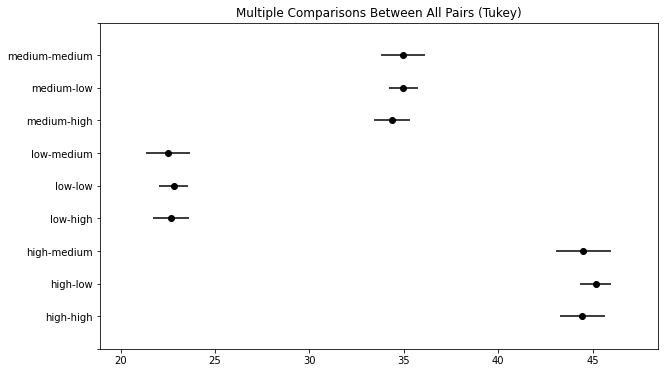

In [51]:
# https://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-16_23.html

from statsmodels.stats.multicomp import pairwise_tukeyhsd
dff = df[df['group']!= 'extremes']
voter_age = dff['num_agents']
voter_race = dff['group']
tukey = pairwise_tukeyhsd(endog=voter_age,     # Data
                          groups=voter_race,   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
# plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

tukey.summary()              # See test summary

In [52]:
tests = []
for race1, race2 in pair: 
    print(race1, race2)
    race11 = df.loc[df['group'] == race1]['adjusted_fitness']
    race21 = df.loc[df['group'] == race2]['adjusted_fitness']
#     tests.append([[race1,race2], stats.ttest_ind(race11, race21)])
    print(stats.ttest_ind(race11, race21)) 

extremes low-low
Ttest_indResult(statistic=-9.176320594377518, pvalue=2.99194135172799e-19)
extremes low-medium
Ttest_indResult(statistic=-5.635438262310578, pvalue=2.5090957864663348e-08)
extremes low-high
Ttest_indResult(statistic=-7.104891985482041, pvalue=2.72368779868062e-12)
extremes medium-low
Ttest_indResult(statistic=-26.523313934837585, pvalue=6.21385647610462e-115)
extremes medium-medium
Ttest_indResult(statistic=-17.057787509118683, pvalue=4.999660763267652e-55)
extremes medium-high
Ttest_indResult(statistic=-20.73814890759625, pvalue=2.1712369890250776e-76)
extremes high-low
Ttest_indResult(statistic=-34.036164502026416, pvalue=3.8726373868024683e-160)
extremes high-medium
Ttest_indResult(statistic=-21.02455556852386, pvalue=6.093092037191882e-76)
extremes high-high
Ttest_indResult(statistic=-24.800112361302247, pvalue=1.4801839875484458e-98)
low-low extremes
Ttest_indResult(statistic=9.176320594377518, pvalue=2.99194135172799e-19)
low-low low-medium
Ttest_indResult(statis

group1,group2,meandiff,p-adj,lower,upper,reject
high-high,high-low,0.6958,0.9,-1.3191,2.7108,False
high-high,high-medium,0.0458,0.9,-2.5554,2.6471,False
high-high,low-high,-21.7944,0.001,-23.9184,-19.6705,True
high-high,low-low,-21.6567,0.001,-23.6033,-19.7101,True
high-high,low-medium,-21.9417,0.001,-24.2683,-19.615,True
high-high,medium-high,-10.0778,0.001,-12.2017,-7.9539,True
high-high,medium-low,-9.4933,0.001,-11.4399,-7.5467,True
high-high,medium-medium,-9.525,0.001,-11.8516,-7.1984,True
high-low,high-medium,-0.65,0.9,-2.9766,1.6766,False
high-low,low-high,-22.4903,0.001,-24.2673,-20.7133,True


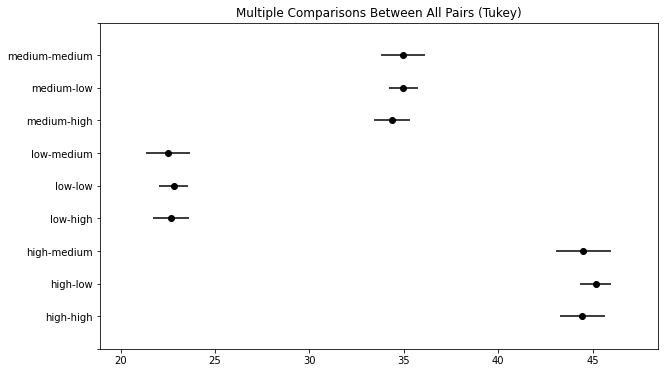

In [53]:
# https://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-16_23.html

from statsmodels.stats.multicomp import pairwise_tukeyhsd
dff = df[df['group']!= 'extremes']
voter_age = dff['num_agents']
voter_race = dff['group']
tukey = pairwise_tukeyhsd(endog=voter_age,     # Data
                          groups=voter_race,   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
# plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

tukey.summary()              # See test summary